## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# KINGS' COUNTY HOUSING PROJECT

## 1. BUSINESS UNDERSTANDING

### 1.1. Project Overview
This project aims to analyze house sales data in King County using regression modeling to estimate house prices and provide insights on how different features, including renovations might impact house prices.

### 1.2. Stakeholders:
1. Real Estate Agents; They will us the model to provide advice to homeowners on property values.
2. Homeowners; They will use the model to make informed decisions about buying,selling or renovating homes.
3. Real Estate Agencies; Intersted in increasing sales and client satisfaction by providing accurate home value estimates.

### 1.3. Business Problem:
Real Estate agencies need a model to estimate house prices and provide advice to homeowners about how  renovations might increase the estimated values of their homes potentially increasing sales and customer satisfaction.


### 1.4. Scope:
Inside Scope:
- Building a regression model to estimate house prices.
- Identifying key features that affect house prices
- Providing actionable insights fot homeownwers regarding renovations.
  
Outside Scope:
- Predicting exact future market trends.
- Estimating prices for houses outside King County.
- Considering economic or policy changes affecting the housing market.


### 1.5 Data Sources
The primary data source is the King County House Sales dataset(kc_house_data.csv).

<!-- Good questions for this stage include:

Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
What business problem(s) will this Data Science project solve for the organization?
What problems are inside the scope of this project?
What problems are outside the scope of this project?
What data sources are available to us?
What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't? -->

### Timeline
Data Understanding and Preparation: 1 week
Modeling: 1 week
Evaluation: 1 week
Presentation and Deployment: 1 week

## DATA UNDERSTANDING

Overview:This dataset contains information about King County House Sales with House price as the Target Variable and various features like bedrooms, bathrooms, sqft_living,condition, grade, etc as the Predictors.
Data Characteristics: Numeric variables(eg sqft_living, price number of bedrooms,number of bathrooms etc)and Categorical variables(eg condition, grade etc).

In [533]:
# Import relevant libraries
import pandas as pd 
import numpy as np 

# Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [534]:
import scipy.stats as stat 
from statsmodels.formula.api import ols 
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [535]:
# Load the dataset
df = pd.read_csv('data/kc_house_data.csv')

In [536]:
# Dispaly the first 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [537]:
# Display the last 5 rows of the dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [538]:
# Summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [539]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [540]:
# Data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


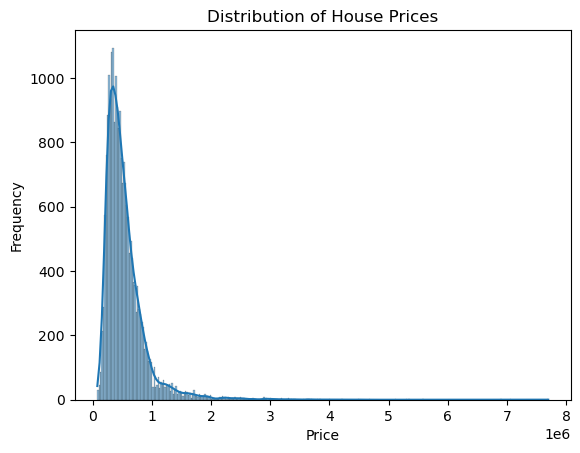

In [541]:
# Distribution of the target variables
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram of 'price' reveals a positively skewed distribution, indicating that a significant number of properties have lower prices while fewer properties command higher prices. To address this skewness and achieve a more symmetrical distribution, we will do a log transformation.

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


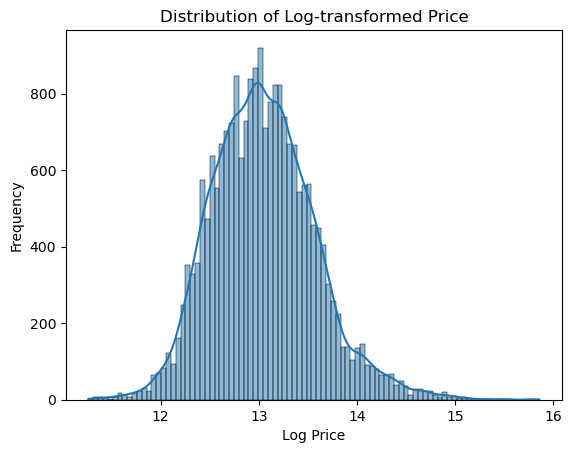

In [542]:

def feature_histogram(feature, log_transform=False):
    """
    Plots a histogram with optional log transformation for a given feature.

    Parameters:
    - feature (str): The column name of the feature to plot.
    - log_transform (bool): If True, applies log transformation to the feature.
    """
    if feature not in df.columns:
        raise ValueError(f"'{feature}' is not a column in the dataframe")

    data = df[feature]
    if log_transform:
        data = np.log1p(data)  # log1p is used to handle zero values

    sns.histplot(data, kde=True)
    plt.title(f'Distribution of {"Log-transformed " if log_transform else ""}{feature.capitalize()}')
    plt.xlabel('Log ' + feature.capitalize() if log_transform else feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# Assuming df is your DataFrame containing the 'price' column
feature_histogram('price', log_transform=True)


### INDEPENDENT VARIABLES

In [543]:
def plot_independent_vars(features_list, log_transform=False):
    if log_transform == True:
        # Create a figure and axes for the plots
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

        # Loop through each numeric variable and create a distplot
        for i, col in enumerate(features_list):

            log_values = np.log(df[col])
            sns.histplot(data=log_values, ax=axes[i//2, i%2], bins=10, kde=True)
            axes[i//2, i%2].set_title(f'Distribution of {col} (Log Transformed)')    

        # Adjust layout
        plt.tight_layout()
        plt.show()
        
    else:
        # Create a figure and axes for the plots
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

        # Loop through each numeric variable and create a distplot
        for i, col in enumerate(features_list):
            
            sns.histplot(data=df[col], ax=axes[i//2, i%2], bins=10, kde=True)
            axes[i//2, i%2].set_title(f'Distribution of {col}')

        # Adjust layout
        plt.tight_layout()
        plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

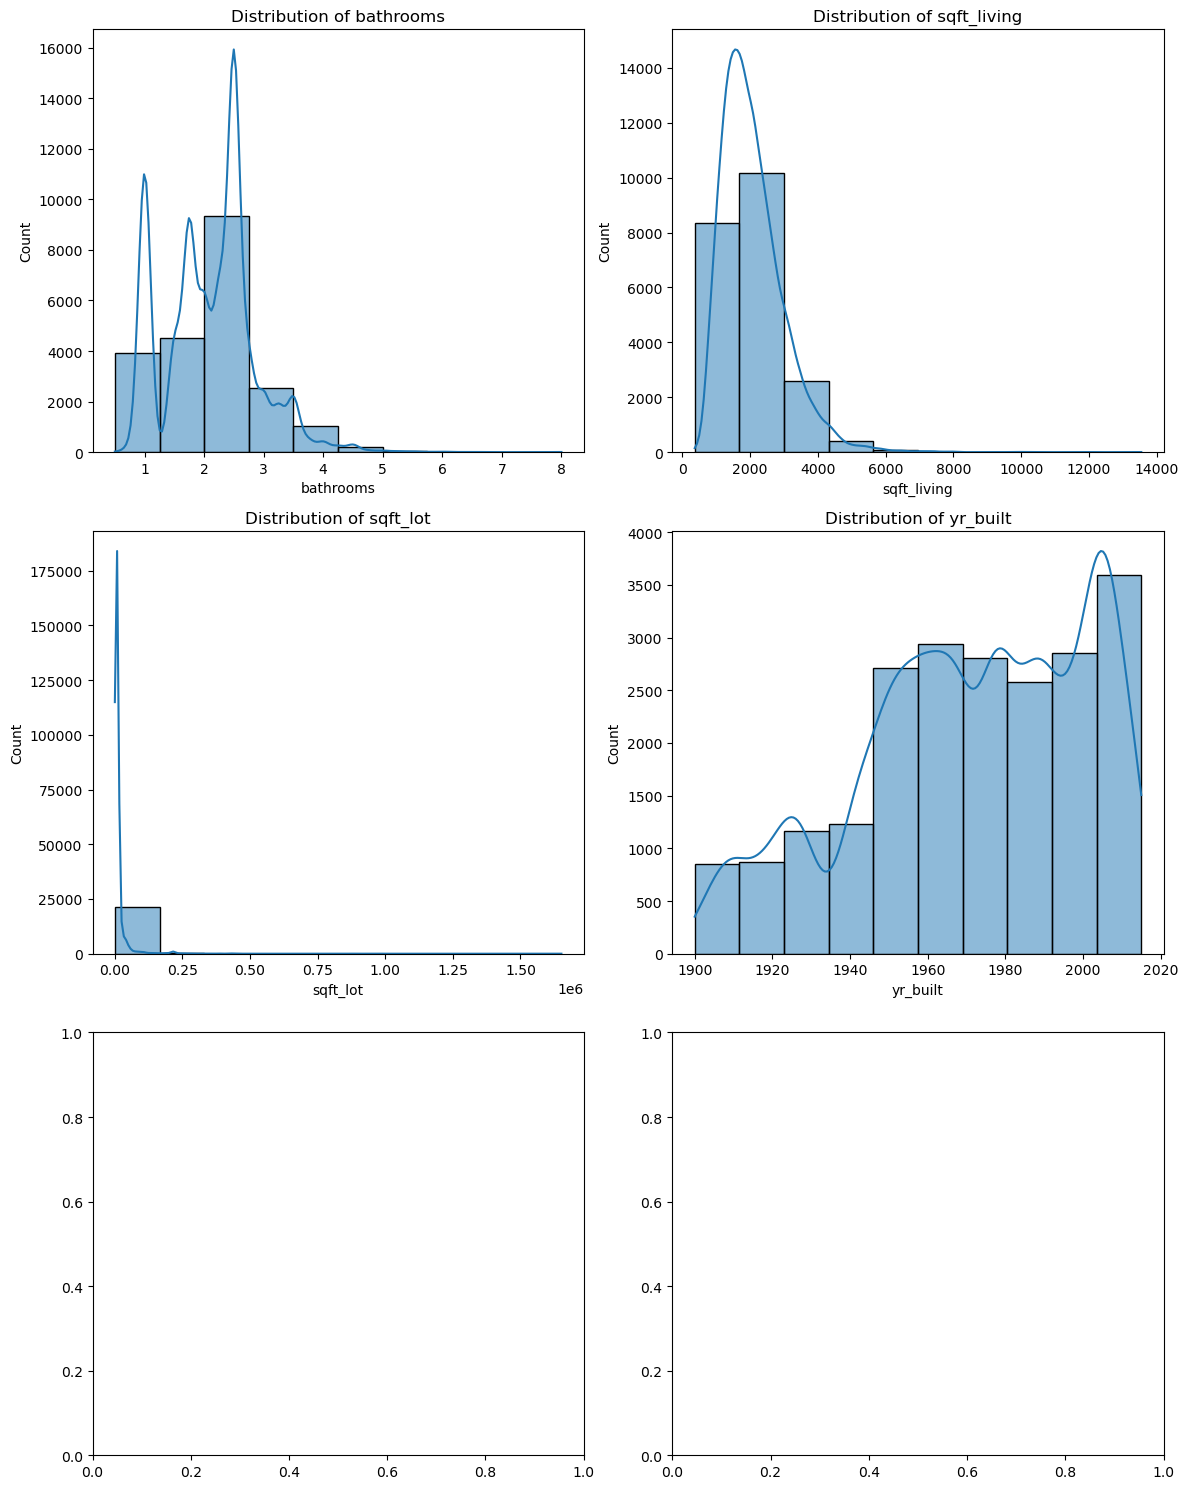

In [544]:
num = ['bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']

plot_independent_vars(num)

##### Comments

Nearly all variables, particularly `sqft_living`, `sqft_lot`, and `age_built`, exhibit positive skewness, we plan to apply log transformations to each variable to assess if the distributions become more normal.

#### Log Transformation of the independent variables

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

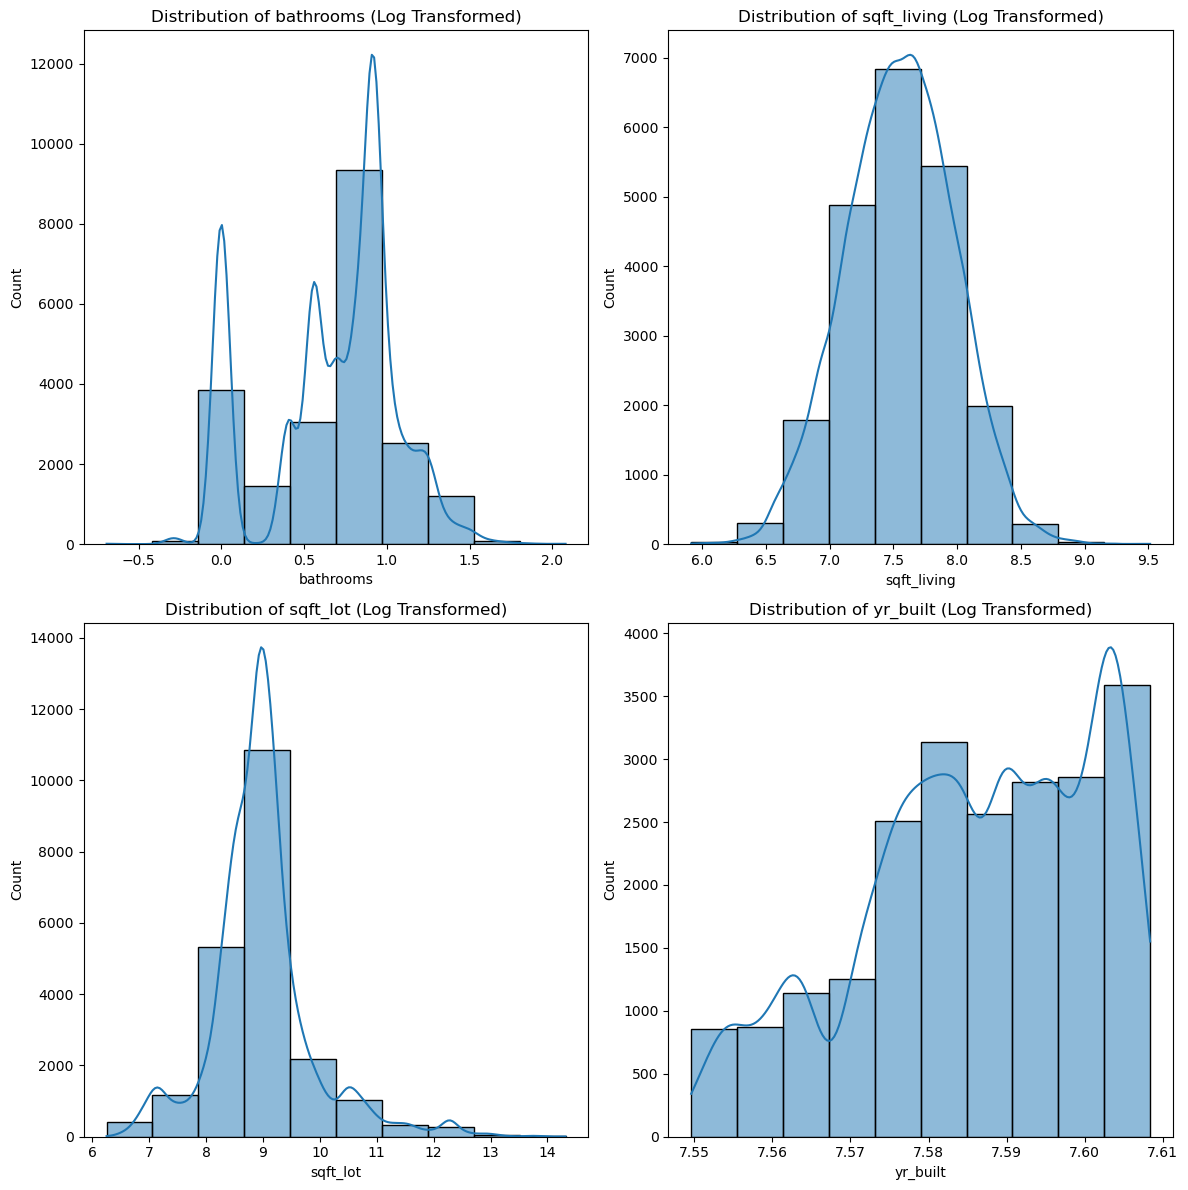

In [545]:
plot_independent_vars(num[:4], log_transform=True)

##### Comments

The log transformation will help stabilize the variance across different levels of the variables, making the relationships between variables more interpretable for the regression modelling.

### Bivariate analysis

Next we will be checking the relationship between price and the numeric independent variables that we will be using.

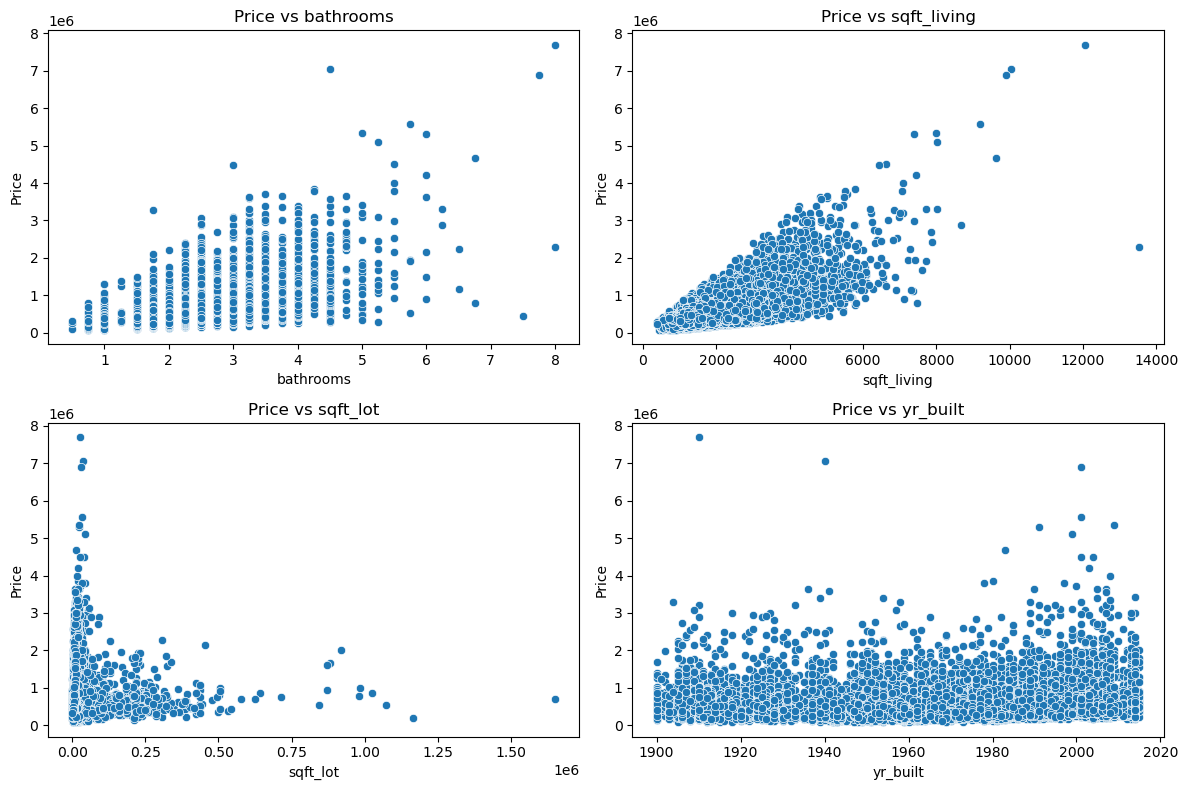

In [546]:
# bivariate analysis for the numerical independent variables
plt.figure(figsize=(12, 8))

for var in num[:4]:
    plt.subplot(2, 2, num.index(var) + 1)
    sns.scatterplot(x=var, y='price', data=df)
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

Only bathrooms and sqft_living have a linear relationship with price 

### Categorical variables

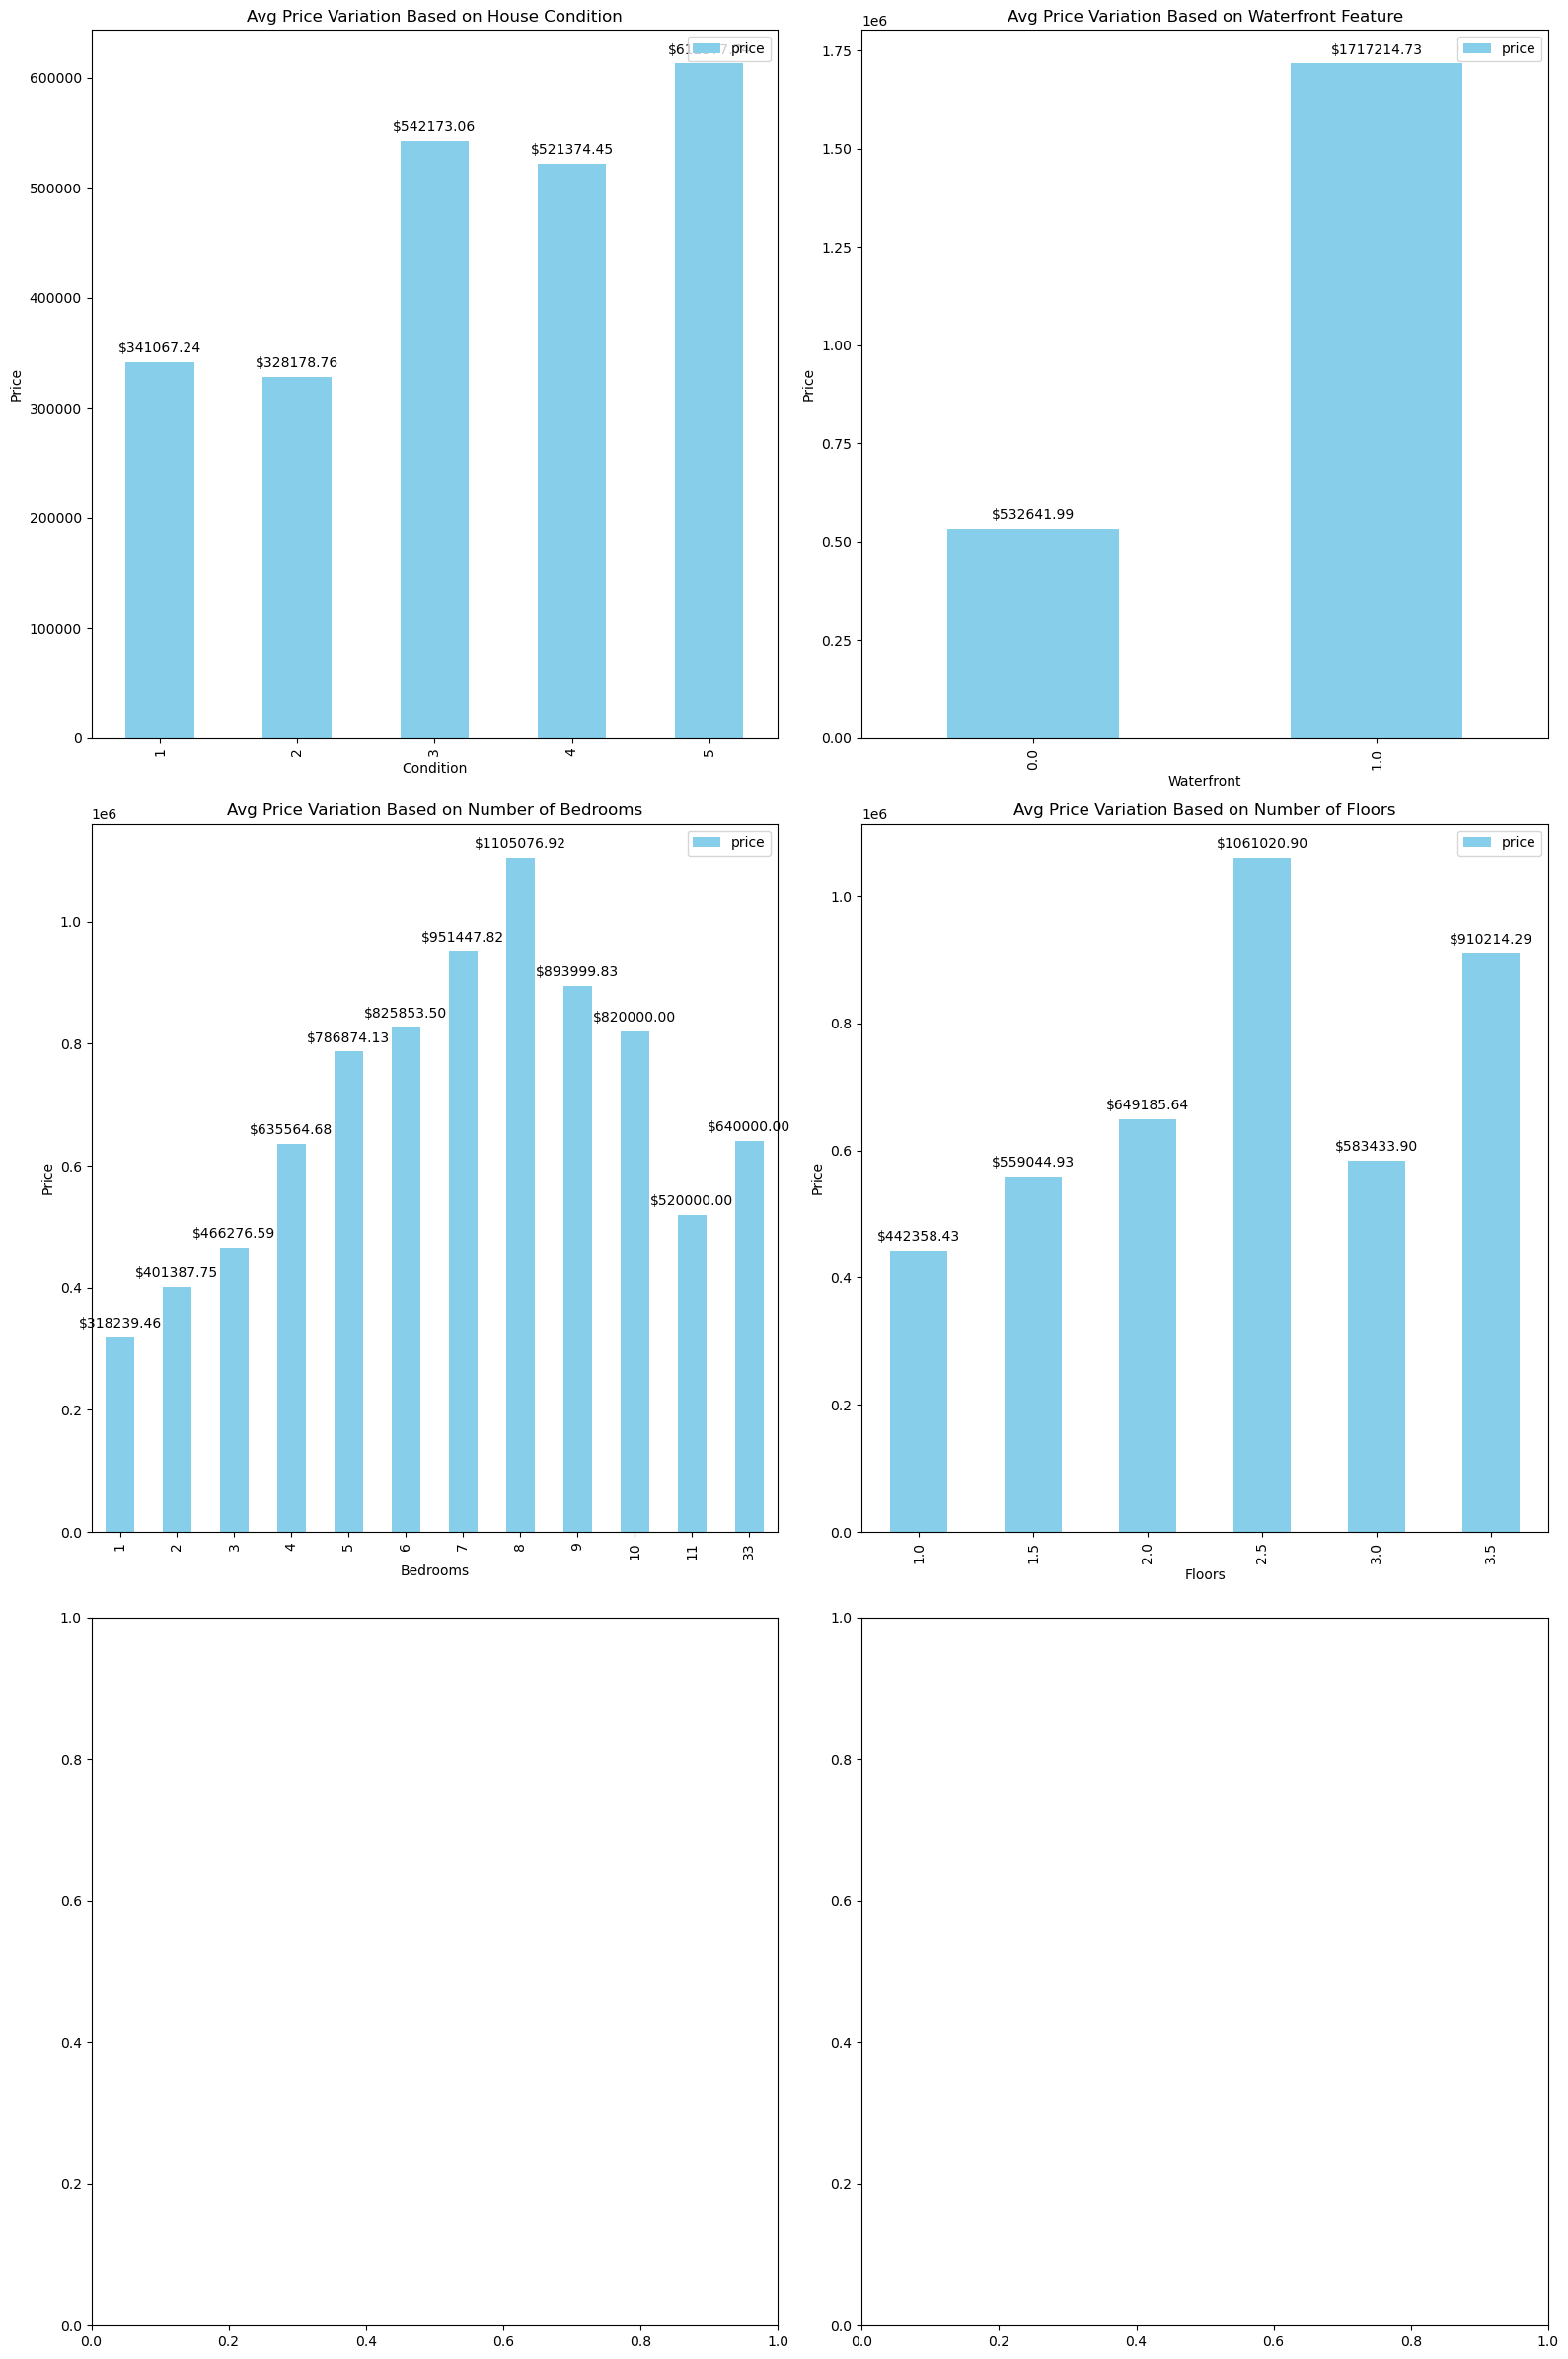

In [547]:
# Define the plots to be created
plots = [
    ('Avg Price Variation Based on House Condition', 'condition', 'Price'),
    ('Avg Price Variation Based on Waterfront Feature', 'waterfront', 'Price'),
    
    ('Avg Price Variation Based on Number of Bedrooms', 'bedrooms', 'Price'),
    ('Avg Price Variation Based on Number of Floors', 'floors', 'Price'),
    
]

# Create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the plots and create bar plots for each
for i, (title, x_col, y_col) in enumerate(plots):
    if x_col in df.columns:
        # Calculate the average price for each group
        avg_prices = df.groupby(x_col)['price'].mean()
        
        # Convert the series to a DataFrame for plotting
        avg_prices_df = avg_prices.reset_index()
        
        # Create a bar plot for the current plot using Pandas' plot function
        avg_prices_df.plot.bar(x=x_col, y='price', ax=axes[i], color='skyblue', edgecolor='none')
        
        # Set the title, x-axis label, and y-axis label for the current subplot
        axes[i].set_title(title)
        axes[i].set_xlabel(x_col.capitalize())
        axes[i].set_ylabel(y_col)
        
        # Add value labels on top of each bar
        for p in axes[i].patches:  # Loop for each patch (bar) in the current subplot axes[i]
            # Add an annotation to the current subplot
            axes[i].annotate(f"${p.get_height():.2f}",  # Format the annotation with two decimal places and a dollar sign
                             (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the annotation at the top center of each bar
                             ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')  # Annotation properties
    else:
        print(f"Column '{x_col}' does not exist in the DataFrame.")

# Adjust the layout of the subplots for better visualization
plt.tight_layout()
plt.show()


## DATA PREPARATION

### Dropping Features

In [548]:
# Dropping the recommended features
df.drop(columns=['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


### Data Cleaning

In [549]:
# Check for duplicates.
df.duplicated()
#df.loc[df.duplicated()]
# Implication: No duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

In [550]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [551]:
# Fill missing values
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

# Confirm that there are no more missing values
(df.isnull().sum().sum())  

0

### Checking for Multicollinearity
Let's check the correlation matrix to identify multicollinearity among predictors.

In [552]:
# Check for multicollinearity among selected features
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
correlation_matrix = df[selected_features].corr()
correlation_matrix


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


#### Observations from the Correlation Matrix

1. **High Correlation Among Features:**
   - sqft_living and grade have the highest correlation coefficient of 0.762779, indicating a strong positive relationship. This suggests that as the grade of the house increases, its living space (in square feet) tends to increase as well. This suggests potential multicollinearity.
   - bedrooms and bathrooms show a strong positive correlation of 0.514508, suggesting that houses with more bedrooms tend to have more bathrooms.

2. **Moderate Correlations:**
   - bathrooms and grade have a moderate positive correlation of 0.665838, indicating that better-graded houses often have more bathrooms.
   - floors and grade have a moderate positive correlation of 0.458794, suggesting that higher-grade houses often have more floors.

3. **Low Correlations:**
   - waterfront and bedrooms have a very low correlation of -0.002127, indicating little to no relationship between whether a house is on the waterfront and the number of bedrooms.
   - condition and grade have a weak negative correlation of -0.146896, suggesting that higher-grade houses might not necessarily have a higher condition score, though the relationship is weak.

4. **Negative Correlations:**
   - condition and yr_built have a strong negative correlation of -0.361592, suggesting that older houses tend to have lower condition scores, which might indicate deterioration over time or less maintenance.
   - sqft_lot and sqft_living show a low positive correlation of 0.173453, implying that the size of the lot has a relatively weak relationship with the size of the living space.

5. **General Trends:**
   - yr_built has moderate positive correlations with several features, including bathrooms (0.507173) and floors(0.489193), indicating that newer houses tend to have more modern features.
   - waterfront has very low correlations with most features, suggesting that being on the waterfront doesn't strongly influence the other variables in this dataset.


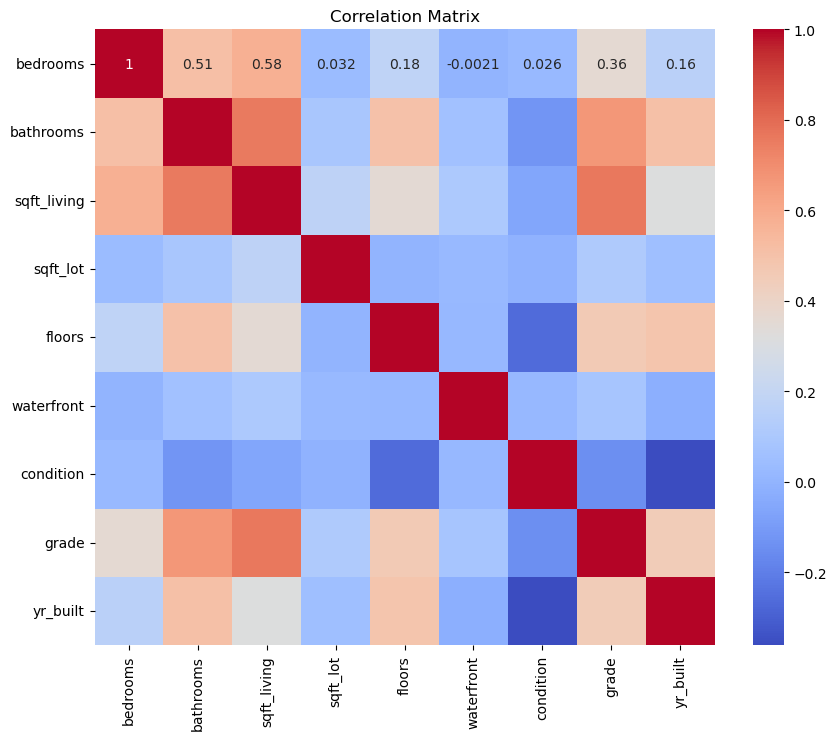

In [553]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [554]:
# Identify top 3 features that have the highest correlation with price
corr_matrix =df.corr()
top_3_features = corr_matrix['price'].abs().sort_values(ascending=False)[1:4]
print("Top 3 features that have the highest correlation with price:\n", top_3_features)

Top 3 features that have the highest correlation with price:
 sqft_living    0.701917
grade          0.667951
bathrooms      0.525906
Name: price, dtype: float64


#### Interpretation

From both the HeatMap and the Corr() Function these are are the top 3 features that have the highest correlation with price. According to the date this are the 3 key players that form integral features for a depth analysis and further exploration

<Axes: xlabel='sqft_living', ylabel='price'>

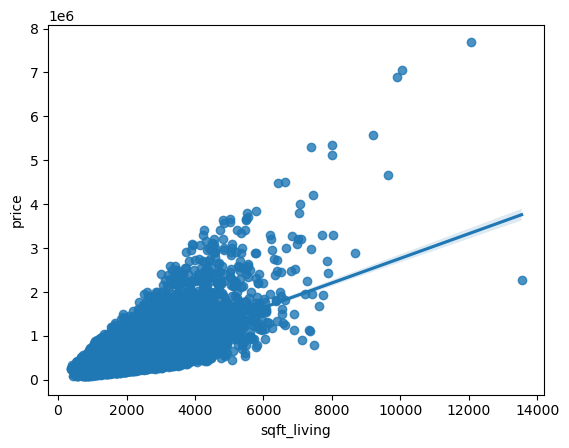

In [555]:
sns.regplot(x=df['sqft_living'],y=df['price'])

<Axes: xlabel='bathrooms', ylabel='price'>

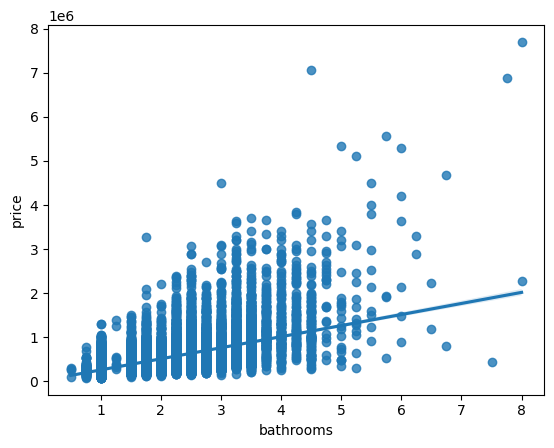

In [556]:
sns.regplot(x=df['bathrooms'],y=df['price'])

<Axes: xlabel='grade', ylabel='price'>

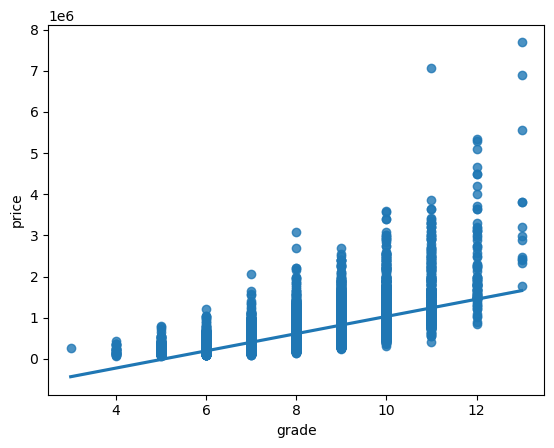

In [557]:
sns.regplot(x=df['grade'],y=df['price'])

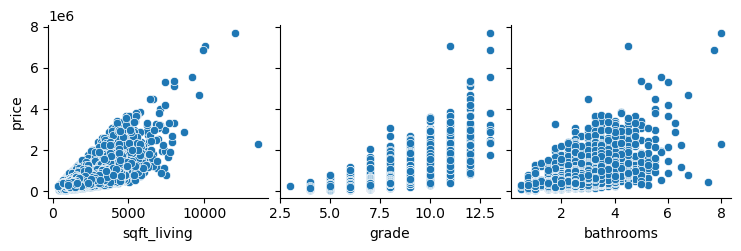

In [558]:
# Visualize the relationship between the top 3 features and price
sns.pairplot(df, x_vars=top_3_features.index, y_vars=['price'])

### Analysis based on the first key feature

#### sqft_living

In [559]:
y = df['price']
X_baseline = df[['sqft_living']]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:46:55   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

These numbers means:

If sqft_living A increases by 1, price increases by  257,900

If sqft_living = 0, the price is equal to 540,300

Remembering that the intercept is used to adjust the model's precision of predicting!

In [560]:
df[['price', 'sqft_living']].describe()

,price,sqft_living
count,2.159700e+04,21597.000000
mean,5.402966e+05,2080.321850
std,3.673681e+05,918.106125
min,7.800000e+04,370.000000
25%,3.220000e+05,1430.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


<Axes: xlabel='sqft_living', ylabel='price'>

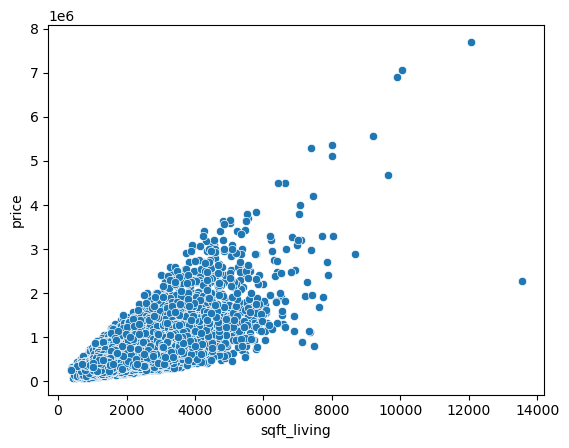

In [561]:
sns.scatterplot(data= df, y = 'price', x = 'sqft_living')

#### bathrooms

In [562]:
y = df['price']
X_baseline = df[['bathrooms']]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:46:56   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.1

These numbers means:

If bathrooms A increases by 1, price increases by  193,200

If bathrooms = 0, the price is equal to 540,300

Remembering that the intercept is used to adjust the model's precision of predicting!

<Axes: xlabel='bathrooms', ylabel='price'>

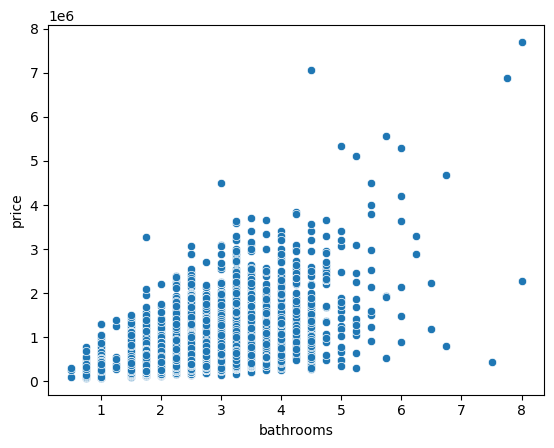

In [563]:
sns.scatterplot(data= df, y = 'price', x = 'bathrooms')

#### grade

In [564]:
y = df['price']
X_baseline = df[['grade']]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:46:56   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.0

These numbers means:

If grade  increases by 1, price increases by  975,500

If grade= 0, the price is equal to 522,300

Remembering that the intercept is used to adjust the model's precision of predicting!

<Axes: xlabel='grade', ylabel='price'>

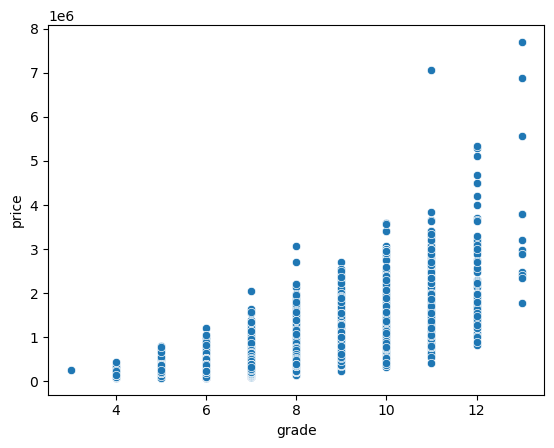

In [565]:
sns.scatterplot(data= df, y = 'price', x = 'grade')

#### Conclusions

If sqft_living A increases by 1, price increases by  257,900

If bathrooms A increases by 1, price increases by  193,200

If grade A increases by 1, price increases by  975,500





### Normalization
We will normalize numerical columns to ensure they are on a similar scale.

In [566]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to be normalized
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])


### Categorical Encoding
We need to convert categorical variables (condition, grade) into numeric format using one-hot encoding.

In [567]:
#def one_hot_encode(df):
    
    # Identify categorical columns (assuming they are of type 'object' or 'category')
    #categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Perform one-hot encoding
    # `drop_first=True` can be used to drop the first level and avoid multicollinearity
    #df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    #return df_encoded

In [568]:
# 'encoding' of categorical features and a view of the 'encoded' dataframe
#kc_data_encoded = one_hot_encode(df)
# Display the first few rows
#kc_data_encoded.head()
# Confirm the data types
#kc_data_encoded.info()

In [569]:

def one_hot_encode(df):
    # Convert categorical variables to 'category' dtype
    df['condition'] = df['condition'].astype('category')
    df['grade'] = df['grade'].astype('category')
    
    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['category']).columns
    
    # Perform one-hot encoding
    # `drop_first=True` can be used to drop the first level and avoid multicollinearity
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df_encoded

# Apply the function to your dataframe
kc_data_encoded = one_hot_encode(df)

# Display the first few rows
print(kc_data_encoded.head())

# Confirm the data types
print(kc_data_encoded.info())


      price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0  221900.0 -0.402903  -1.451073    -0.980652 -0.228182 -0.915552         0.0   
1  538000.0 -0.402903   0.174486     0.533369 -0.189739  0.937431         0.0   
2  180000.0 -1.482493  -1.451073    -1.427234 -0.123139 -0.915552         0.0   
3  604000.0  0.676687   1.149821    -0.131057 -0.243878 -0.915552         0.0   
4  510000.0 -0.402903  -0.150626    -0.436040 -0.169503 -0.915552         0.0   

   yr_built  condition_2  condition_3  ...  grade_4  grade_5  grade_6  \
0 -0.544678        False         True  ...    False    False    False   
1 -0.680850        False         True  ...    False    False    False   
2 -1.293626        False         True  ...    False    False     True   
3 -0.204247        False        False  ...    False    False    False   
4  0.544700        False         True  ...    False    False    False   

   grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
0  

In [570]:
# Sample to inspect column names before and after encoding
print("Original columns:", df.columns)
print("Encoded columns:", kc_data_encoded.columns)


Original columns: Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')
Encoded columns: Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'yr_built', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')


## Modeling
### Model Selection

In [571]:
# Define features and target
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
                     'condition_2', 'condition_3', 'condition_4', 'condition_5', 
                      'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 
                     'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'yr_built']
target = 'price'

# Split the data into training and testing sets
X = kc_data_encoded[selected_features]
y = kc_data_encoded[target]
# Standardize features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


### Initial Modeling

In [572]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Model Performance:')
print(f'MSE: {mse}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f' R^2: {r2}')


Linear Regression Model Performance:
MSE: 0.3479589076600451
RMSE: 0.59
MAE:0.38
 R^2: 0.6393835417577303


The model has a reasonable performance with moderate error metrics and an R² value that suggests a fair amount of the variance in house prices is explained by the features.
The RMSE and MAE provide practical insights into the average prediction errors, and the R² indicates that approximately 64% of the variance in house prices can be explained by the model. This indicates a strong relationship between the features and the target variable,

In [573]:
# Cross-Validation
cv_scores = cross_val_score(lr_model, X_scaled, y_scaled, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-Validated RMSE: {cv_rmse:.2f}")

# Print coefficients to understand the impact of each feature
coefficients = pd.DataFrame(lr_model.coef_, selected_features, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)

Cross-Validated RMSE: 22222291.38

Coefficients:
             Coefficient
bedrooms       -0.076649
bathrooms       0.121058
sqft_living     0.354966
sqft_lot       -0.032634
floors          0.043371
waterfront      0.160346
condition_2     0.008099
condition_3     0.078211
condition_4     0.092893
condition_5     0.088821
grade_4         0.002615
grade_5         0.011674
grade_6         0.070148
grade_7         0.233780
grade_8         0.330419
grade_9         0.375843
grade_10        0.365959
grade_11        0.325095
grade_12        0.237837
grade_13        0.186913
yr_built       -0.282206


Feature Significance: Features like sqft_living, grade_, and waterfront have strong positive effects on house prices. In contrast, features like bedrooms and sqft_lot have smaller and sometimes negative impacts.

Model Performance: The high RMSE suggests that while the model captures some relationships, it might not be effectively generalizing, indicating potential areas for improvement.

### Advanced Modeling

In [574]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Random Forest R^2: {r2_score(y_test, y_pred)}')



Random Forest MSE: 0.29339846624597404
Random Forest R^2: 0.6959287047345608


The Random Forest model has a lower MSE compared to the Linear Regression model, indicating better performance in terms of average squared error on the test set. This suggests that the Random Forest model makes predictions that are, on average, closer to the actual values than the Linear Regression model.

The Random Forest model has a higher R^2 value compared to the Linear Regression model. This indicates that the Random Forest model explains a greater proportion of the variance in the target variable (price). In other words, it fits the data better and captures more of the underlying patterns in the dataset.

#### Regression for grade_11

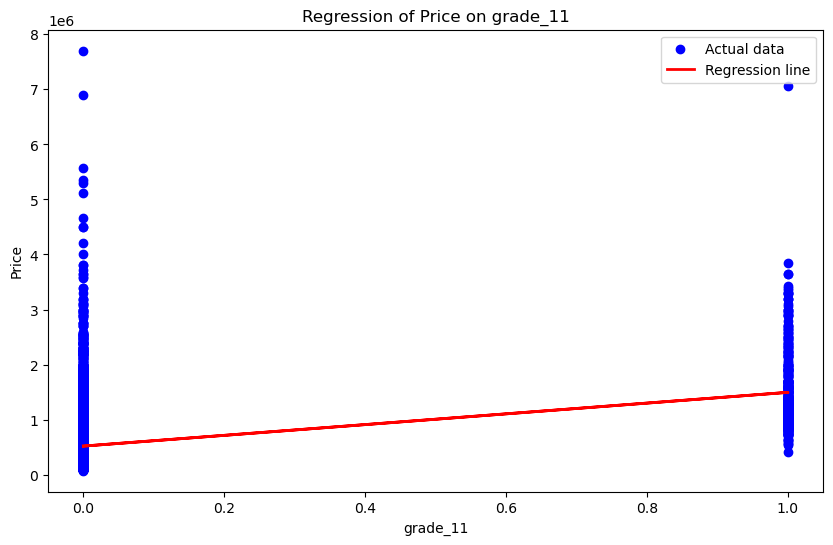

Mean Squared Error (MSE): 117696639050.11504
R-squared (R^2): 0.12787006856131078


In [575]:

# Replace 'grade_11' with the grade feature identified as having the best results
best_grade_feature = 'grade_11'

def visualize_and_evaluate_regression(x, y, variable_name):
    # Reshape x for sklearn
    x_reshaped = x.values.reshape(-1, 1)
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y using the model
    y_pred = model.predict(x_reshaped)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Actual data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(f'Regression of Price on {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R^2): {r2}')

# Get the best grade feature and target variable 'price'
x = kc_data_encoded[[best_grade_feature]]  # Independent variable
y = kc_data_encoded['price']               # Dependent variable

# Evaluate the relationship
visualize_and_evaluate_regression(x, y, variable_name=best_grade_feature)


The plot indicates that houses graded as "Excellent" (grade_11 = 1) generally command higher prices compared to those that are not graded as "Excellent" (grade_11 = 0). However, the wide spread of prices within each category suggests that grade_11 is not the sole determinant of house prices, and other features also play a significant role.

#### Regression for waterfront

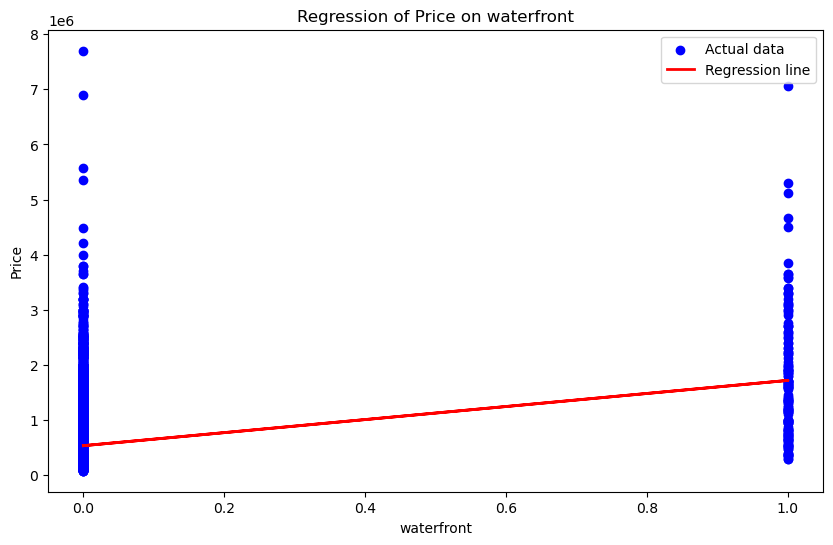

Mean Squared Error (MSE): 125525573273.88026
R-squared (R^2): 0.06985780990281942


In [576]:

def visualize_and_evaluate_regression(x, y, variable_name):
    # Reshape x for sklearn
    x_reshaped = x.values.reshape(-1, 1)
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y using the model
    y_pred = model.predict(x_reshaped)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Actual data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(f'Regression of Price on {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R^2): {r2}')

# Get the 'waterfront' feature and target variable 'price'
x = kc_data_encoded[['waterfront']]  # Independent variable
y = kc_data_encoded['price']          # Dependent variable

# Evaluate the relationship
visualize_and_evaluate_regression(x, y, variable_name='waterfront')


#### Regression for sqft_living

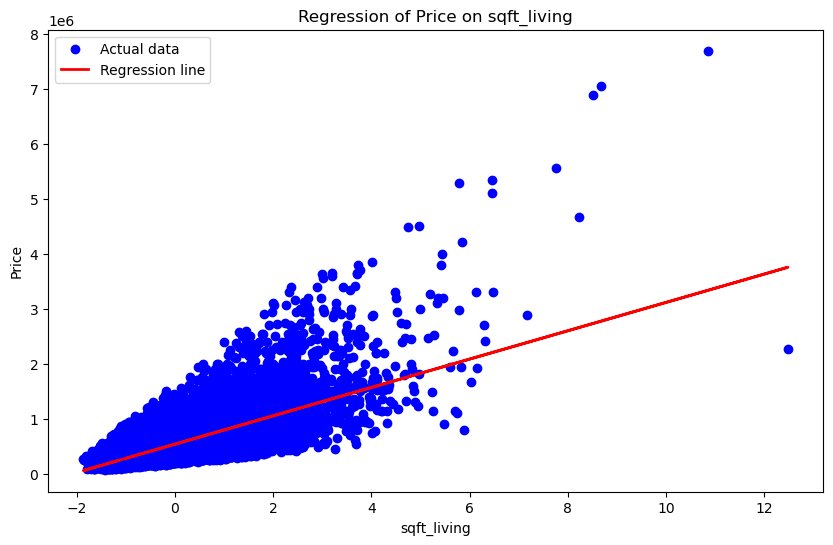

Mean Squared Error (MSE): 68463341389.86132
R-squared (R^2): 0.49268789904035093


In [577]:

# Define the function to visualize and evaluate regression
def visualize_and_evaluate_regression(x, y, variable_name):
    # Reshape x for sklearn
    x_reshaped = x.values.reshape(-1, 1)
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y using the model
    y_pred = model.predict(x_reshaped)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Actual data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(f'Regression of Price on {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R^2): {r2}')

# Using the function for 'sqft_living' variable
x_sqft_living = kc_data_encoded[['sqft_living']]  # Independent variable
y_price = kc_data_encoded['price']                # Dependent variable
visualize_and_evaluate_regression(x_sqft_living, y_price, variable_name='sqft_living')


#### Regression for bathrooms

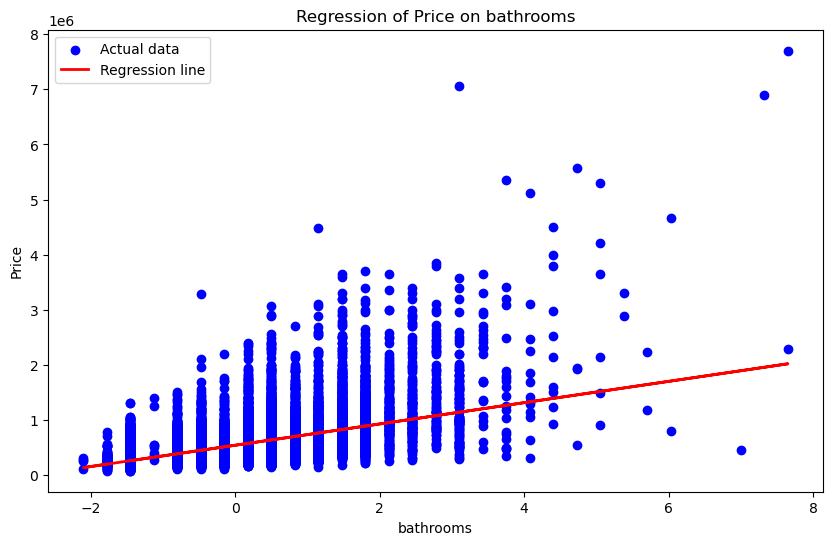

Mean Squared Error (MSE): 97628214882.143
R-squared (R^2): 0.27657672267607736


In [578]:

# Define the function to visualize and evaluate regression
def visualize_and_evaluate_regression(x, y, variable_name):
    # Reshape x for sklearn
    x_reshaped = x.values.reshape(-1, 1)
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y using the model
    y_pred = model.predict(x_reshaped)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Actual data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(f'Regression of Price on {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R^2): {r2}')

# Using the function
x = kc_data_encoded[['bathrooms']]  # Independent variable
y = kc_data_encoded['price']       # Dependent variable
visualize_and_evaluate_regression(x, y, variable_name='bathrooms')


#### Regression for bedrooms

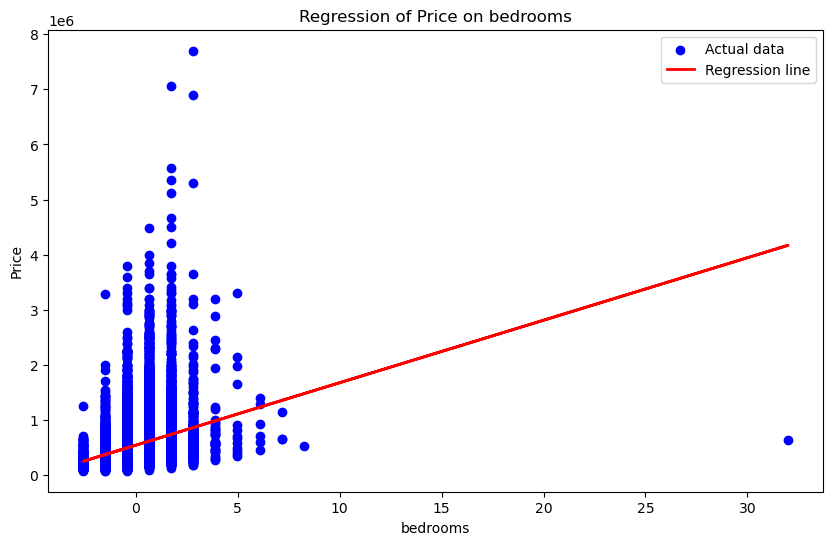

Mean Squared Error (MSE): 122085363262.43721
R-squared (R^2): 0.0953497028373066


In [579]:

# Define the function to visualize and evaluate regression
def visualize_and_evaluate_regression(x, y, variable_name):
    # Reshape x for sklearn
    x_reshaped = x.values.reshape(-1, 1)
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y using the model
    y_pred = model.predict(x_reshaped)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Actual data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(f'Regression of Price on {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R^2): {r2}')

# Using the function for 'bedrooms' variable
x_bedrooms = kc_data_encoded[['bedrooms']]  # Independent variable
y_price = kc_data_encoded['price']          # Dependent variable
visualize_and_evaluate_regression(x_bedrooms, y_price, variable_name='bedrooms')


## Multi-Linear Regression Modelling

In [580]:

def multi_linear_model(df, selected_features, target='price', test_size=0.25):
    
    # Ensure all data is numeric and handle missing values
    df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')
    df[target] = df[target].apply(pd.to_numeric, errors='coerce')
    df = df.dropna()

    # Split the data into features and target
    X = df[selected_features]
    y = df[target]

    # Standardize features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=test_size, random_state=42)

    # Initialize and train the Linear Regression model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Calculate train and test scores
    train_score = linreg.score(X_train, y_train)
    test_score = linreg.score(X_test, y_test)

    # Print train-test split proportions and scores
    print(f'Train-test split of: {(1-test_size)*100:.1f}% - {test_size*100:.1f}%')
    print(f'Training Score: {train_score*100:.2f} %')
    print(f'Test Score: {test_score*100:.2f} %')

    # Print the OLS summary
    X_train_sm = sm.add_constant(X_train)
    sm_model = sm.OLS(y_train, X_train_sm).fit()
    
    print("\nOLS Regression Results")
    print("="*80)
    print(sm_model.summary())
    print("="*80)

    return sm_model

# Example usage
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
                     'condition_2', 'condition_3', 'condition_4', 'condition_5', 
                     'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 
                     'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'yr_built']
target = 'price'

# Assuming kc_data_encoded is already defined and loaded
model = multi_linear_model(kc_data_encoded, selected_features, target=target, test_size=0.25)


Train-test split of: 75.0% - 25.0%
Training Score: 68.05 %
Test Score: 64.87 %

OLS Regression Results
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1641.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:47:15   Log-Likelihood:                -13696.
No. Observations:               16197   AIC:                         2.744e+04
Df Residuals:                   16175   BIC:                         2.761e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

## MODEL EVALUATION

Train-test split of: 75.0% - 25.0%
Training Score: 68.05 %
Test Score: 64.87 %

These scores indicate that the model explains about 68.05% of the variance in the training data and 64.87% of the variance in the test data. This suggests that the model has a reasonable fit, but there is room for improvement.

OLS Regression Results
The OLS summary provides a detailed breakdown of the model's coefficients, their statistical significance, and other diagnostics. Key points from the summary include:

R-squared: 0.681, meaning 68.1% of the variance in the dependent variable (price) is explained by the independent variables.
Adj. R-squared: 0.680, slightly lower than the R-squared, accounting for the number of predictors in the model.
F-statistic: 1641, with a p-value of 0.00, indicating that the overall model is statistically significant.
Significant predictors (p < 0.05) in the model include:

Bedrooms (x1)
Bathrooms (x2)
Sqft Living (x3)
Sqft Lot (x4)
Floors (x5)
Waterfront (x6)
Condition (x10 to x15)
Grade (x16 to x20)
Year Built (x21)
The coefficients provide the expected change in the dependent variable for a one-unit change in the predictor, holding all else constant. For instance, the number of bedrooms (x1) has a negative coefficient, indicating that, all else equal, an increase in bedrooms might reduce the price, possibly due to multicollinearity or other factors.


## Recommendations and Next Steps

- Focus on improving key features like bathrooms, square footage, and waterfront views. These have significant positive impacts on house prices.
Consider renovations or upgrades that improve the condition and grade of houses, as these are also significant predictors of price.

- The model shows that having a waterfront view significantly increases house prices. Real estate agents should highlight this feature when marketing properties with waterfront access. Invest in or develop waterfront properties to maximize returns.
Analyze the impact of location variables further (e.g., neighborhood analysis) to target high-value areas.

- Use the model to set competitive prices by considering the significant predictors. Ensure that pricing strategies reflect the contributions of these key features.

- Highlight features with the highest impact on price in marketing materials (e.g., newly renovated bathrooms, high-grade finishes, and waterfront views).Tailor marketing strategies based on the model’s insights to emphasize the most valued aspects of properties.

- Higher grades (e.g., grade_11) are associated with significantly higher prices. Consider investing in property upgrades and renovations to improve the overall grade of the property.

- Older houses (yr_built) have a negative impact on price. This suggests that newer properties tend to have higher values, so renovation and updating older properties could be beneficial.
  
- Properties in better condition (condition_5) command higher prices. Regular maintenance and improvements are essential to maximize property value.
  
- The coefficients suggest that having more bedrooms or bathrooms might not always increase price as expected. This could indicate that other factors, such as location or property condition, may play a more significant role. Evaluate whether adding more rooms or focusing on improving existing features offers better returns.
  
### Next Steps

- Investigate and address multicollinearity. This could involve removing or combining highly correlated features to improve model stability.
  
- The residuals show signs of non-normality. Revisit the data transformation methods to address this issue and ensure the model meets regression assumptions.

- Explore creating interaction terms or polynomial features to capture more complex relationships between features and house prices.

- Try alternative regression models, such as Ridge or Lasso regression, which can handle multicollinearity better.

- Consider applying transformations to the dependent variable (price) or independent variables to meet the assumptions of linear regression.

- Dive deeper into the data to understand any anomalies or patterns that weren't initially considered. This could involve more detailed EDA (Exploratory Data Analysis).
Validation:

- Use cross-validation techniques to better understand the model’s performance and ensure it generalizes well to unseen data.